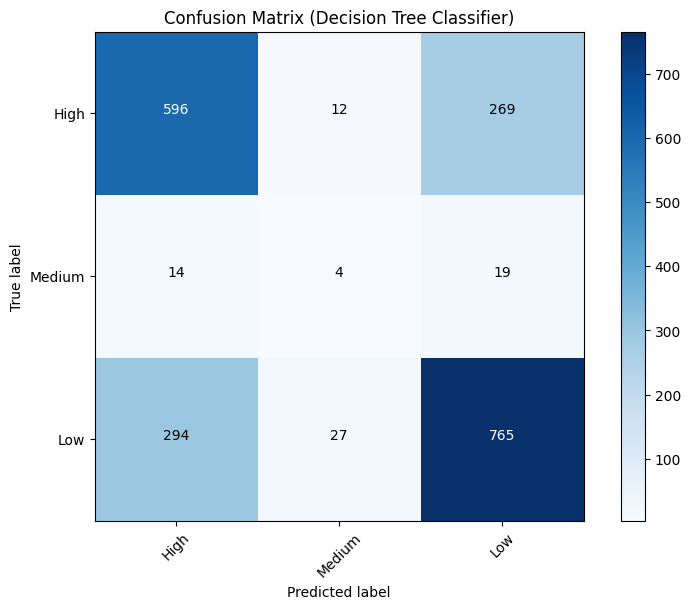

(0.6825,
 '              precision    recall  f1-score   support\n\n        High       0.66      0.68      0.67       877\n         Low       0.09      0.11      0.10        37\n      Medium       0.73      0.70      0.72      1086\n\n    accuracy                           0.68      2000\n   macro avg       0.49      0.50      0.49      2000\nweighted avg       0.69      0.68      0.68      2000\n')

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Load the dataset
csv_file_path = './movies.csv'
movies_df = pd.read_csv(csv_file_path)

# Data Preprocessing
# Convert 'YEAR' to numeric by extracting the year part
movies_df['YEAR'] = movies_df['YEAR'].str.extract('(\d{4})').astype(float)

# Convert 'VOTES' to numeric by removing commas
movies_df['VOTES'] = movies_df['VOTES'].str.replace(',', '').astype(float)

# Selecting features and transforming 'Rating' into categorical classes
features = movies_df[['YEAR', 'RunTime', 'VOTES']]

def categorize_rating(rating):
    if rating >= 7.0:
        return 'High'
    elif rating < 4.0:
        return 'Low'
    else:
        return 'Medium'

movies_df['RatingCategory'] = movies_df['RATING'].apply(categorize_rating)
target_categorical = movies_df['RatingCategory'].fillna('Medium')  # Assuming medium for missing values

# Handling missing values: Impute missing values with the median
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Normalizing the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Splitting the dataset into training and testing sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    features_scaled, target_categorical, test_size=0.2, random_state=42)

# Applying Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_cat, y_train_cat)

# Predicting and evaluating the model
y_pred_cat = decision_tree_classifier.predict(X_test_cat)
accuracy = accuracy_score(y_test_cat, y_pred_cat)
classification_rep = classification_report(y_test_cat, y_pred_cat)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute and plot confusion matrix
cnf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['High', 'Medium', 'Low'],
                      title='Confusion Matrix (Decision Tree Classifier)')

plt.show()

accuracy, classification_rep
